In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
from shapely.geometry import LineString

In [51]:
main_folder_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Reads in the road data and turns it into a geodataframe
df = pd.read_csv(main_folder_path + "/data/bridges_cleaned_flood.csv")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

In [52]:
flood_map = gpd.read_file(main_folder_path + "/data/CycloonData/Nodes_Intersec_ExportFeature.shp",crs="EPSG:4326")

In [53]:
flood_map['CycloonCat'] = pd.cut(flood_map['COUNT_'], bins=[0, 6, 12, 17,23,33], labels=['0', '1', '2',"3","4"])

In [54]:
gdf_N= gdf[gdf["road"].isin(['N1','N2',"N102","N104","N105","N204","N207","N208","N8"])]
lines_N = gpd.GeoSeries([LineString(gdf_N[gdf_N["road"]==road].geometry) for road in gdf_N["road"].unique() ], crs="EPSG:4326")

In [55]:
pol_list =[]
for line in lines_N:
    flood_rel = flood_map["geometry"].intersects(line)
    flood_rel = flood_rel[flood_rel.values]
    pol_list.append(flood_map[flood_map.index.isin(flood_rel.index)])
rel_region = pd.concat(pol_list)

<AxesSubplot:>

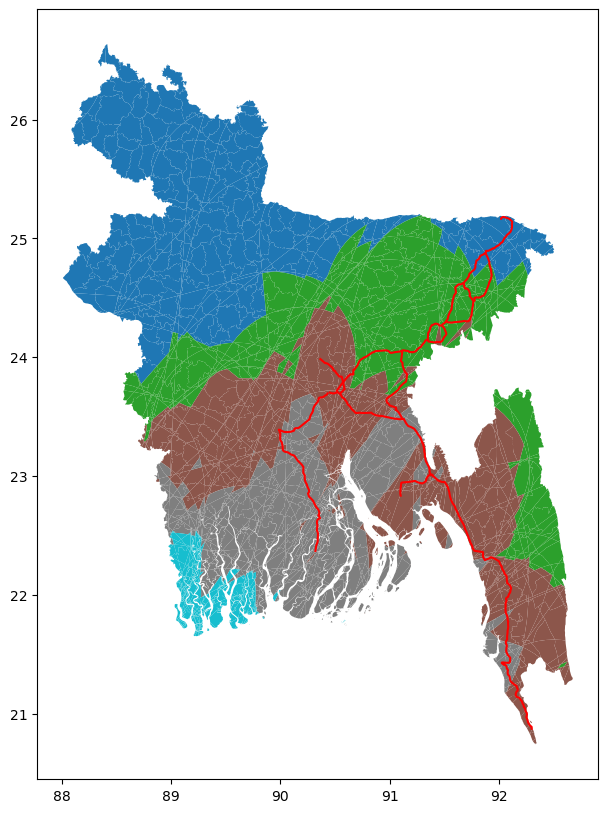

In [56]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
flood_map.plot(ax=ax,column="CycloonCat")
lines_N.plot(ax=ax,color="red")

<AxesSubplot:>

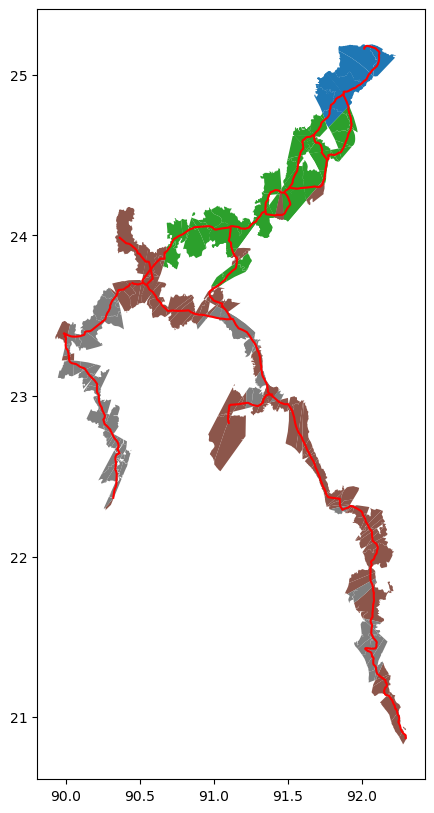

In [57]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
rel_region.plot(ax=ax,column="CycloonCat")
lines_N.plot(ax=ax,color="red")

In [58]:
flood_value =[]
for point_index in gdf_N.index:
    point = gdf_N.loc[point_index,"geometry"]
    region_index =rel_region["geometry"].intersects(point)
    try:
        region = flood_map[flood_map.index.isin(region_index[region_index.values].index)].head(1)["CycloonCat"].values[0]
        flood_value.append(region)
    except:   
        flood_value.append(0)
gdf_N["CycloonCat"] = flood_value

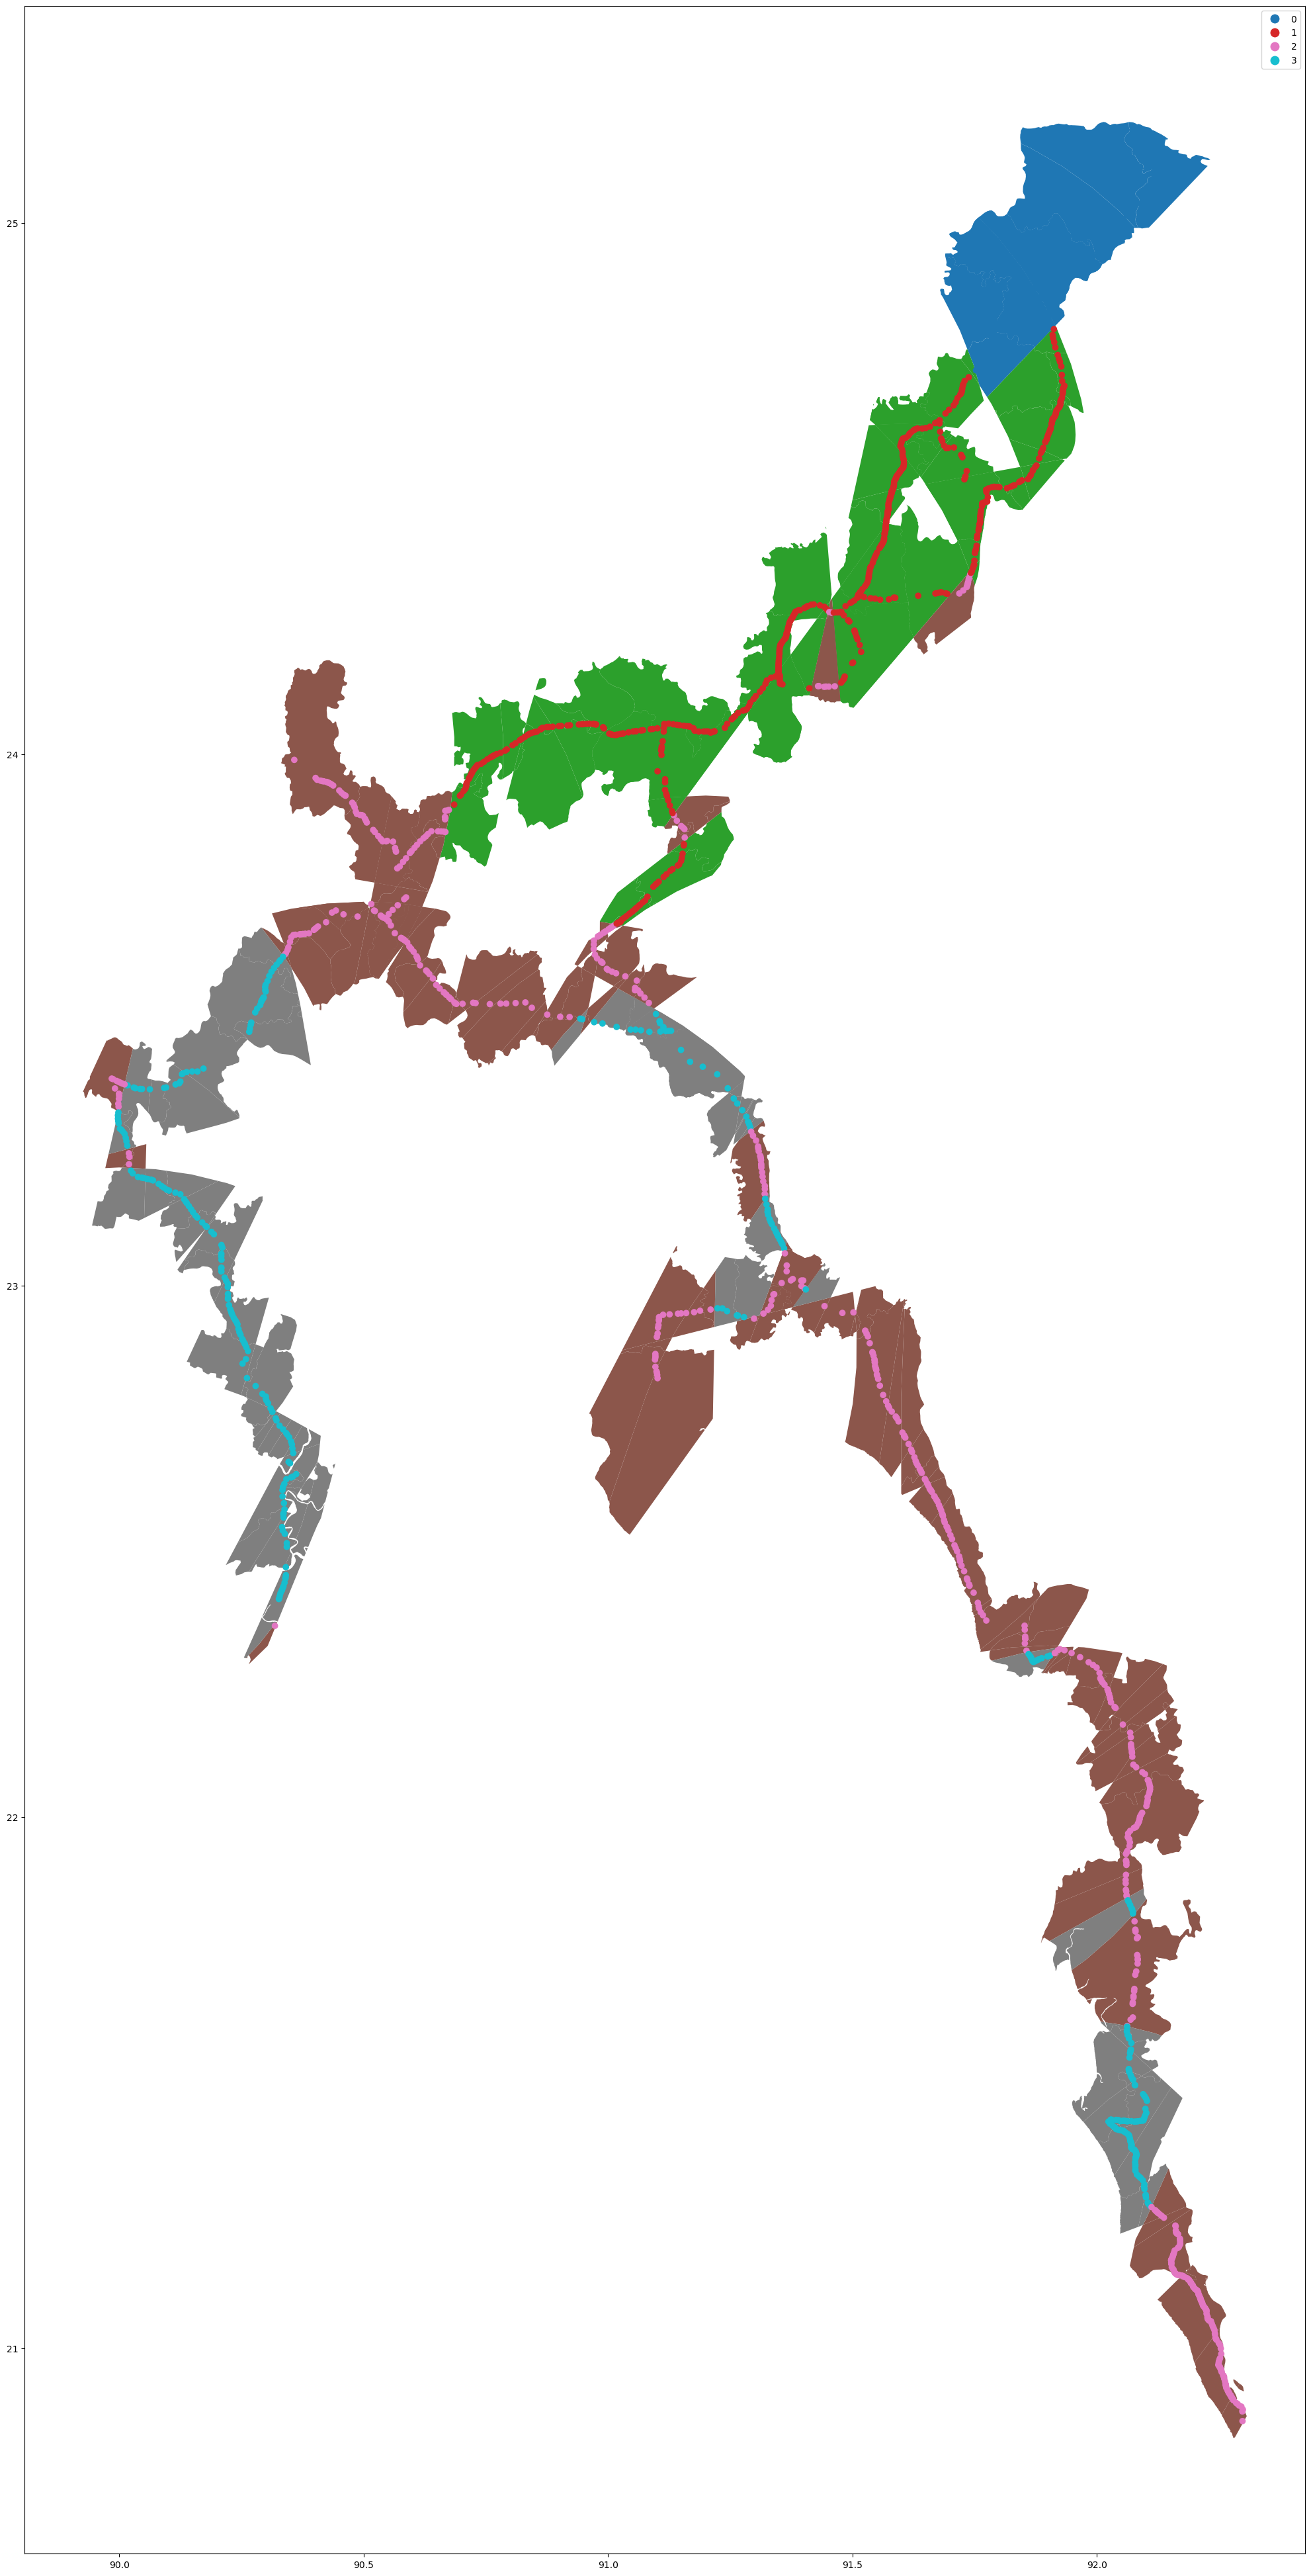

In [60]:
fig,ax=plt.subplots(1,1,figsize=(50,50))

rel_region.plot(ax=ax,column="CycloonCat")
gdf_N.plot(ax=ax,column="CycloonCat",categorical=True,legend=True)
plt.show()

In [61]:
gdf_N.to_csv(main_folder_path + "/data/bridges_cleaned_maps.csv")